# Задание 1. Определение трендов и сезонности во временных рядах

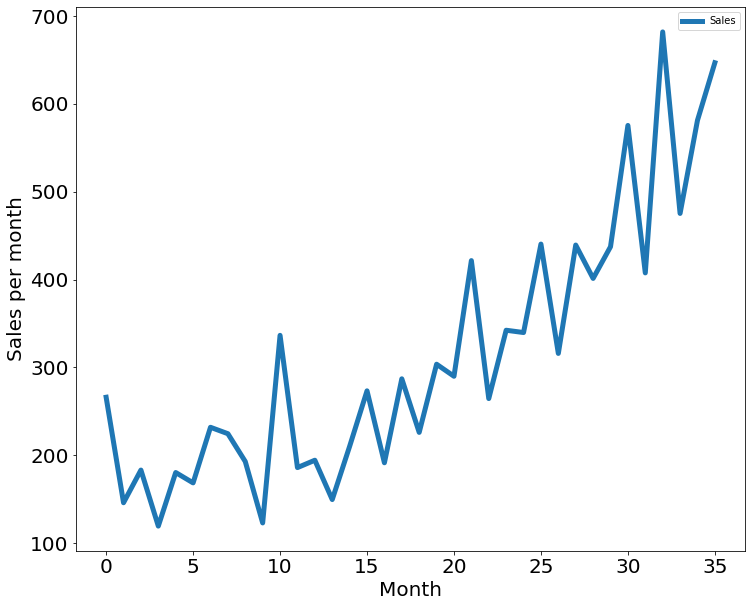

In [7]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# читаем input-файл
df = pd.read_csv('shampoo_sales.csv')
sales = df[['Sales']]
sales.plot(figsize=(12,10),
linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Sales per month',
fontsize=20)
plt.show()


In [4]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


Text(0.5, 0, 'Month')

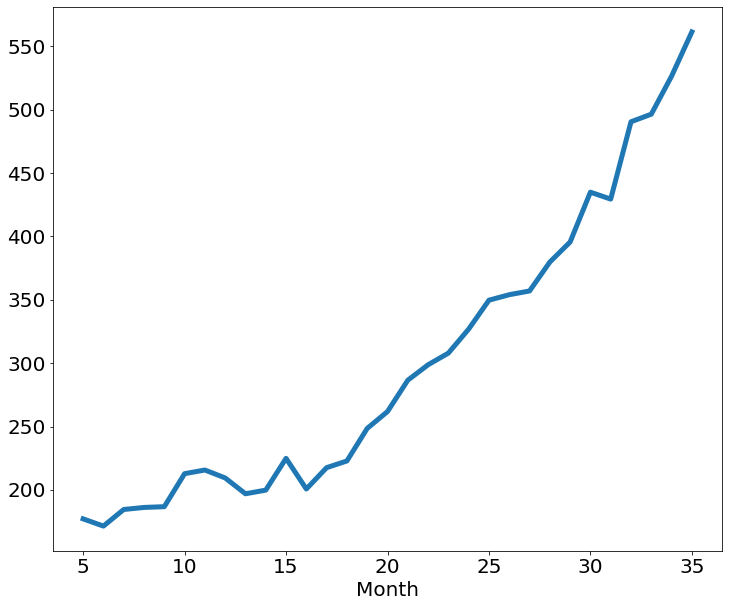

In [5]:
df['Sales'].rolling(window =6).mean().plot(figsize=(12,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20)
# восходящий тренд, продажи растут

Text(0.5, 0, 'Month')

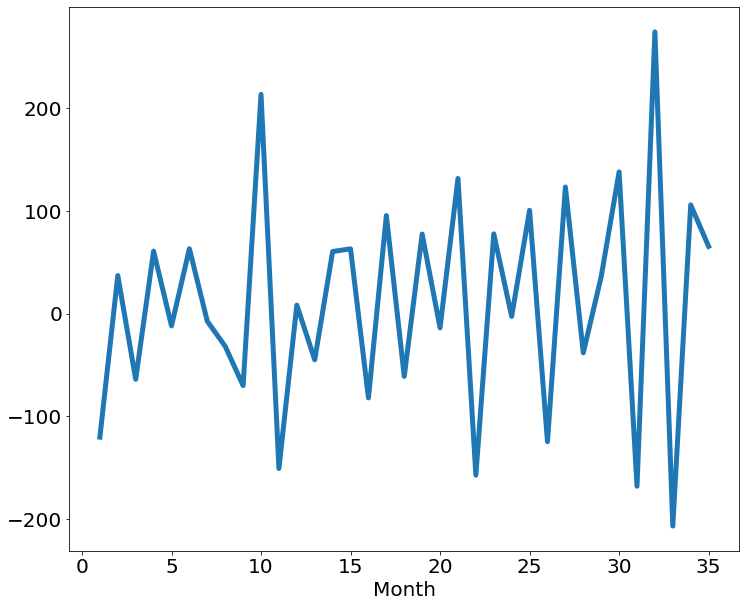

In [6]:
df['Sales'].diff().plot(figsize=(12,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20)
# сезонность, самые высокие продажи наблюдаются какждый октябрь
# самые низкие продажи - зимой

# Задание 2. Исследование периодичности и построение графика автокорреляции

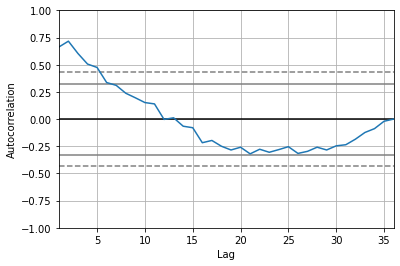

In [ ]:
pd.plotting.autocorrelation_plot(df['Sales'])
plt.show()
'''первые 12 лагов - позитивная корреляция, остальные - негативная'''

# Задание 3. Построй модель скользящего прогноза ARIMA


In [3]:
import itertools
import warnings
import statsmodels.api as sm
from math import sqrt
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
# Определите p, d и q в диапазоне 0-2
p = d = q = range(0, 6)
# Сгенерируйте различные комбинации p, q и q
pdq = list(itertools.product(p, d, q))
# Сгенерируйте комбинации сезонных параметров p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 0, 4, 12)


In [ ]:
# Находим оптимальные параметры p,d,q и сезонности для ARIMA модели
# чем меньше AIC - тем лучше
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      col = df['Sales']
      mod = sm.tsa.statespace.SARIMAX(col,
      order=param,
      seasonal_order=param_seasonal,
      enforce_stationarity=False,
      enforce_invertibility=False)
      results = mod.fit()
      print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
    except:
      continue
# для использования сезонных параметров необходима SARIMAX, она будет более точной
# в рамках задания ограничимся обычной моделью ARIMA

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:510.8546234144903
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:309.63269589021763
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:152.75128367144515
ARIMA(0, 0, 0)x(0, 3, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 5, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:308.61958713804745
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:168.03590486547643
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:151.46928157410193
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:473.2974965989265
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:295.98873253103454
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:140.4093007757708
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:308.4922500040479
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:168.854266423015
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:141.52622245367093
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:439.75750279619035
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:277.63507470621937
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:129.5311110406324
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:309.583

predicted=272.964489, expected=421.600000
predicted=290.313732, expected=264.500000
predicted=349.117773, expected=342.300000
predicted=306.512989, expected=339.700000
predicted=387.376418, expected=440.400000
predicted=348.154132, expected=315.900000
predicted=386.308780, expected=439.300000
predicted=356.082032, expected=401.300000
predicted=446.379500, expected=437.400000
predicted=394.737242, expected=575.500000
predicted=434.915524, expected=407.600000
predicted=507.923412, expected=682.000000
predicted=435.482873, expected=475.300000
predicted=652.743762, expected=581.300000
predicted=546.343510, expected=646.900000
Test RMSE: 86.878


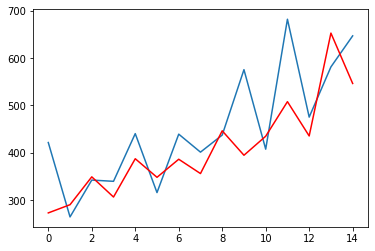

In [10]:
# загрузка датасета
sales = df[['Sales']]
# разделение выборки на тренировочную и тестовую
size = int(len(sales) * 0.6)
train_set, test_set = sales.values[0:size], sales.values[size:len(sales)]
history = [x for x in train_set]
predictions = list()
# валидация
for t in range(len(test_set)):
  model = sm.tsa.ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  predictions.append(output[0])
  history.append(test_set[t])
  print('predicted=%f, expected=%f' % (output[0], test_set[t]))
# подсчет прогноза
rmse = sqrt(mean_squared_error(test_set, predictions))
print('Test RMSE: %.3f' % rmse)
# график прогноза и фактических данных
plt.plot(test_set)
plt.plot(predictions, color='red')
plt.show()